In [12]:
from keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
from keras.utils import to_categorical
import numpy as np

Učitati skup podataka *Fashion MNIST* i ispisati broj i veličinu slika u skupu za obučavanje i skupu za testiranje.

In [13]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Izvršiti normalizaciju piksela i eventualno promeniti kodiranje ciljne promenljive.

In [14]:
X_train = X_train / 255
X_test = X_test / 255
amount = len(np.unique(y_train))
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

Nacrtati prvih $9$ slika iz test skupa, u mreži $3 \times 3$. Kao naslov svake slike postaviti ime klase kojoj slika pripada.

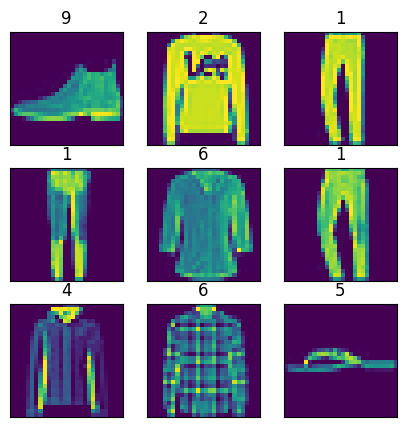

In [15]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.title(y_test[i])
plt.show()

Napraviti potpuno povezanu neuronsku mrežu sa sledećom arhitekturom:
- Sloj za ravnanje (Flatten)
- Potpuno povezani sloj sa $64$ neurona i ReLu aktivacionom funkcijom
- Potpuno povezani sloj sa brojem neurona jednakim broju klasa i softmax aktivacionom funkcijom

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=y_train_categorical.shape[1], activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Obučiti model - postaviti veličinu paketa (batch size) na $64$, broj epoha na $10$.

Iskoristiti $20\%$ trening podataka za validaciju.

In [17]:
history = model.fit(X_train, y_train_categorical, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 6s 6ms/step - loss: 0.5725 - accuracy: 0.8023 - val_loss: 0.4466 - val_accuracy: 0.8438
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4234 - accuracy: 0.8499 - val_loss: 0.4020 - val_accuracy: 0.8591
Epoch 3/10
750/750 [==============================] - 5s 6ms/step - loss: 0.3825 - accuracy: 0.8631 - val_loss: 0.3831 - val_accuracy: 0.8650
Epoch 4/10
750/750 [==============================] - 7s 9ms/step - loss: 0.3564 - accuracy: 0.8714 - val_loss: 0.3698 - val_accuracy: 0.8678
Epoch 5/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3396 - accuracy: 0.8771 - val_loss: 0.3940 - val_accuracy: 0.8595
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3250 - accuracy: 0.8819 - val_loss: 0.3592 - val_accuracy: 0.8704
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3105 - accuracy: 0.8855 - val_loss: 0.3527 - val_accuracy: 0.8752
Epoch 

Nacrtati grafik promene funkcije greške kroz epohe na skupu za obučavanje i za validaciju.

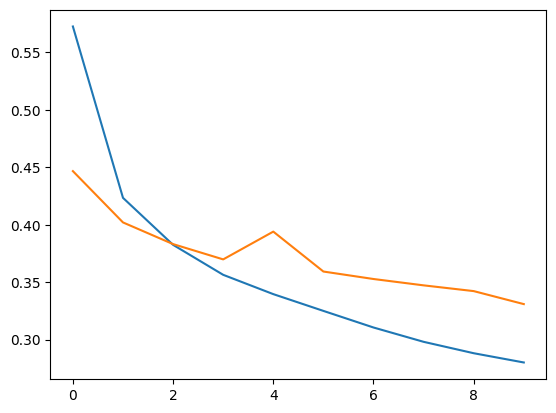

In [18]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

Nacrtati grafik promene tačnosti kroz epohe na skupu za obučavanje i za validaciju.

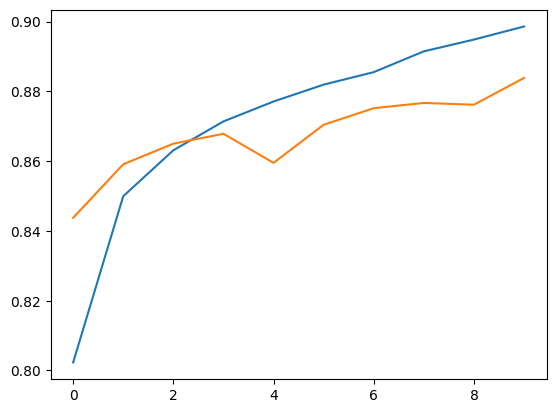

In [19]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])

Izvršiti evaluaciju modela na skupu za testiranje.

In [20]:
model.evaluate(X_test, y_test_categorical, batch_size=64)

157/157 [==============================] - 1s 3ms/step - loss: 0.3557 - accuracy: 0.8748


[0.3557054102420807, 0.8748000264167786]

Nacrtati istih $9$ instanci kao na početku. Sada pored stvarne klase, dodati i predviđenu klasu u naslov.

In [21]:
y_predicted = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


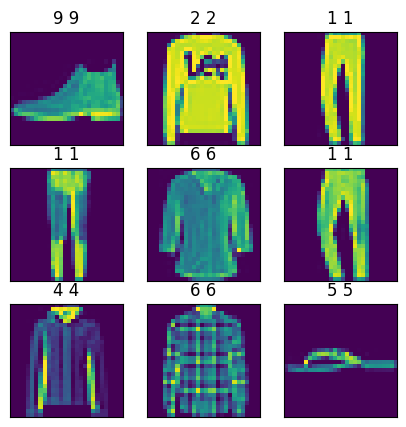

In [22]:
def get_class(array):
  max = float('-inf')
  i_max = -1
  n = len(array)
  for i in range(n):
    if array[i]>max:
      max = array[i]
      i_max = i
  return i_max

plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.title(str(get_class(y_predicted[i])) + " " + str(y_test[i]))
plt.show()